<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Documentation" data-toc-modified-id="Documentation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Documentation</a></span></li><li><span><a href="#DataFrames-Assessment" data-toc-modified-id="DataFrames-Assessment-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>DataFrames Assessment</a></span><ul class="toc-item"><li><span><a href="#Read-in-Dataframes" data-toc-modified-id="Read-in-Dataframes-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Read in Dataframes</a></span></li><li><span><a href="#Inspect-Dataframes" data-toc-modified-id="Inspect-Dataframes-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Inspect Dataframes</a></span><ul class="toc-item"><li><span><a href="#Agency" data-toc-modified-id="Agency-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Agency</a></span></li><li><span><a href="#Calendar-Dates" data-toc-modified-id="Calendar-Dates-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Calendar Dates</a></span></li><li><span><a href="#Stop_Times" data-toc-modified-id="Stop_Times-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Stop_Times</a></span><ul class="toc-item"><li><span><a href="#Investigations-for-GTFS-understanding-/-integration-with-DB" data-toc-modified-id="Investigations-for-GTFS-understanding-/-integration-with-DB-3.2.3.1"><span class="toc-item-num">3.2.3.1&nbsp;&nbsp;</span>Investigations for GTFS understanding / integration with DB</a></span></li></ul></li><li><span><a href="#Shape" data-toc-modified-id="Shape-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Shape</a></span></li><li><span><a href="#Trips" data-toc-modified-id="Trips-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Trips</a></span></li><li><span><a href="#Stops" data-toc-modified-id="Stops-3.2.6"><span class="toc-item-num">3.2.6&nbsp;&nbsp;</span>Stops</a></span></li><li><span><a href="#Calendar" data-toc-modified-id="Calendar-3.2.7"><span class="toc-item-num">3.2.7&nbsp;&nbsp;</span>Calendar</a></span></li><li><span><a href="#Routes" data-toc-modified-id="Routes-3.2.8"><span class="toc-item-num">3.2.8&nbsp;&nbsp;</span>Routes</a></span></li></ul></li></ul></li><li><span><a href="#Exploratory-Table-Joins" data-toc-modified-id="Exploratory-Table-Joins-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Table Joins</a></span><ul class="toc-item"><li><span><a href="#Table-Join-Routes-+-Trips:-Inspect-shape-variations-by-route_id" data-toc-modified-id="Table-Join-Routes-+-Trips:-Inspect-shape-variations-by-route_id-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Table Join Routes + Trips: Inspect shape variations by route_id</a></span><ul class="toc-item"><li><span><a href="#For-§4.3,-below:-list-of-shapes-for-this-route-and-its-directions.-Do-they-overlap?" data-toc-modified-id="For-§4.3,-below:-list-of-shapes-for-this-route-and-its-directions.-Do-they-overlap?-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>For §4.3, below: list of shapes for this route and its directions. Do they overlap?</a></span></li></ul></li><li><span><a href="#Join-Trips,-Stop-Times,-and-Stops-—" data-toc-modified-id="Join-Trips,-Stop-Times,-and-Stops-—-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Join Trips, Stop Times, and Stops —</a></span></li><li><span><a href="#Do-shapes-overlap?" data-toc-modified-id="Do-shapes-overlap?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Do shapes overlap?</a></span></li></ul></li></ul></div>

# Imports

In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:80% !important;}</style>'))

In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [4]:
# Display plots in the notebook
%matplotlib inline

In [4]:
def assess_df(df):
  
    feature_types = {df[df.columns[x]].dtypes.name for x in range(len(df.columns))}
    
  	# print datatypes
  
    print("Datatypes:\n")
    print(df.dtypes)
    print('\n\n')
    
    # print number rows and cols
    print('*' * 50)
    print('ROWS, COLUMNS, NULLS\n')
    print(df.shape[0], "rows in the dataframe.")
    print(df.shape[1], "columns in the dataframe.\n")
    print(df.isnull().sum().sum(), "null values in the dataframe.")
    
    # check duplicate rows & col; print if present
    
    duplicate_rows = df.duplicated(keep=False).sum()
    duplicate_cols = df.index.T.duplicated(keep=False).sum()
    
    print(duplicate_rows, "duplicate rows")
    print(duplicate_cols, "duplicate columns")
    
    if duplicate_rows > 0 or duplicate_cols > 0:
      print(df.loc[df.duplicated()])
	
    print('\n')
    
    # check for constant columns
    
    numeric_cols = list(df.select_dtypes(include=[np.number]).columns.values)
    categorical_cols = list(df.select_dtypes('category').columns.values)
    
    standard_diffs = [df.describe().loc['std', x] for x in numeric_cols]
    
    constant_categorical_column=False
    if 'category' in feature_types:
        for column in categorical_cols:
            if df[column].describe().index.unique == 1:
                constant_categorical_column = True
            
            
    if 0 in standard_diffs:
        print("Constant numeric columns: TRUE")
    else:
        print("Constant numeric columns: FALSE")
  
    if 'category' in feature_types:    
        if constant_categorical_column == True:
            print("Constant categorical columns: TRUE")
        else:
            print("Constant categorical columns: FALSE")

            
    
    print('\n\n')

    
    # feature stats
    print('*' * 50)
    print('DESCRIPTION\n')
    print(df.describe().T)
    print('\n\n')
    print('*' * 50)

    
    # feature stats: categorical
    
    if 'category' in feature_types:
        print('CATEGORICAL DESCRIPTION\n')
        print('\n')
        print(df.select_dtypes(['category']).describe().T)
        print('\n\n')
        print('*' * 50)
    
    # print feature cardinalities
    
    print("FEATURE CARDINALITIES\n")
    column_names = list(df.columns.values)

    print('{0:45}  {1}'.format("Feature", "Distinct Values"))
    print('{0:45}  {1}'.format("-------", "--------------- \n"))

    for c in column_names:
        print('{0:45}  {1}'.format(c, str(len(df[c].unique()))))
    
    print('\n')
    print('*' * 50)
    print('MEMORY\n')
    
    
    print(df.info(memory_usage='deep'))
    print('\n')
    print(df.memory_usage(deep=True))
    print('\n')
    print('*' * 50)
    print('HEAD\n')
    print(df.head(10))
    print('\n')
    print('*' * 50)
    print('TAIL\n')
    print(df.tail(10))

# Documentation

The 'stoppointid' attribute is the bus stop id which can be linked to actual bus stops using the open data in the Dublin Bus GTFS file.

<br>

GTFS **stop_times** *stop_id* (4239) and Dublin Bus **leavetimes** *STOPPOINTID* (4774) ?

Legend / Documentation source

<br>

https://developers.google.com/transit/gtfs/reference/#field-definitions

**From above, general legend (incomplete here)**

<br>

**Service day:**

A time period used to indicate route scheduling. The exact definition of service day varies from agency to agency, but service days often don't correspond to calendar days. A service day may exceed 24:00:00 if service begins on one day and ends on a following day. For example, service that runs from 08:00:00 on Friday to 02:00:00 on Saturday could be denoted as running from 08:00:00 to 26:00:00 on a single service day.

<br>

**Date:**

A service day that's given in the YYYYMMDD format. Because the time within a service day can be above 24:00:00, a service day often contains information for the subsequent days.

<br>

**Latitude:** 

A WGS84 latitude in decimal degrees. The value must be greater than or equal to -90.0 and less than or equal to 90.0.

<br>

**Longitude:**

A WGS84 longitude in decimal degrees. The value must be greater than or equal to -180.0 and less than or equal to 180.0.

<br>

**Time:**

A time given in the HH:MM:SS format. H:MM:SS is also accepted. The time is measured from "noon minus 12 hours" at the beginning of the service day. This is effectively midnight, except for days on which daylight savings time changes occur. For times after midnight, enter the time as a value greater than 24:00:00 in HH:MM:SS local time for the day on which the trip schedule begins.

<br>

**Timepoint**

Timepoints are scheduled stops where the vehicle strictly adheres to the specified arrival and departure times. For example, if a transit vehicle arrives at a stop before the scheduled departure time, it holds until the departure time. If a given stop isn't a timepoint, use either an empty string value for the arrival_time or departure_time fields or provide an interpolated time. To indicate that interpolated times have been provided, use a value of 0 for the timepoint field. If that's done, you must use a value of timepoint=1 to indicate times entered as timepoints. Be sure to provide arrival and departure times for all stops that are timepoints.

<br>



# DataFrames Assessment

## Read in Dataframes

In [5]:
os.chdir('/Users/davidodwyer/Documents/studyCS/Semester_3/data/original_raw_data/google_transit_dublinbus')
print(os.getcwd())

/Users/davidodwyer/Documents/studyCS/Semester_3/data/original_raw_data/google_transit_dublinbus


In [6]:
files = glob.glob('*.txt')
files_paths = [os.path.join(os.getcwd(), f) for f in files]
dataframes_names = [file.strip('.txt') for file in files]

In [7]:
for i, name in enumerate(dataframes_names):
    globals() [name] = pd.read_csv(files_paths[i])

In [8]:
files

['agency.txt',
 'calendar_dates.txt',
 'stop_times.txt',
 'shapes.txt',
 'trips.txt',
 'stops.txt',
 'calendar.txt',
 'routes.txt']

## Inspect Dataframes

### Agency

In [21]:
agency.head()

,agency_url,agency_name,agency_timezone,agency_id,agency_lang
0,http://www.transportforireland.ie,Dublin Bus,Europe/Dublin,978,EN


In [33]:
agency.shape

(1, 5)

### Calendar Dates

"Defines exceptions for the services defined in the calendar.txt file. If calendar.txt is omitted, then calendar_dates.txt is required and must contain all dates of service."

<br>

**service_id** 

Identifies a set of dates when a service exception is available for one or more routes. Each pair of (service_id, date) can only appear once in calendar_dates.txt. If the same service_id value appears in both the calendar.txt and calendar_dates.txt files, the information in calendar_dates.txt modifies the service information specified in calendar.txt. This field is referenced by the trips.txt file. 

<br>

**date**

Specifies a particular date when service availability is different than normal. You can use the exception_type field to indicate whether service is available on the specified date.

<br>

**exception_type**

Indicates whether service is available on the date specified in the date field. The following are valid values for this field: 1: Service has been added for the specified date; 2: Service has been removed for the specified date. For example, suppose a route has one set of trips available on holidays and another set of trips available on all other days. You could have one service_id that corresponds to the regular service schedule and another service_id that corresponds to the holiday schedule. For a particular holiday, you would use the calendar_dates.txt file to add the holiday to the holiday service_id and to remove the holiday from the regular service_id schedule.

<br>

There are 16 days on which an exception to a body of services will occur; overall 5 of 6 bodies of services are affected.


In [66]:
calendar_dates.shape

(16, 3)

In [75]:
# list the categories of trips that suffer a disruption
# there are 6 such categories in total: see calendar.txt

calendar_dates.service_id.value_counts().index

Index(['1_merged_7781', '1_merged_7778', '3_merged_7779', '2_merged_7780',
       '3_merged_7782'],
      dtype='object')

In [78]:
# each exception is defined for a date
# there are this many such days of expcetion

len(calendar_dates.date.value_counts().index)

16

In [36]:
# show full set of exceptinos

calendar_dates

,service_id,date,exception_type
0,3_merged_7779,20190608,2
1,3_merged_7782,20190805,2
2,1_merged_7781,20190715,2
3,1_merged_7781,20190701,2
4,1_merged_7781,20190617,2
5,1_merged_7781,20190624,2
6,1_merged_7781,20190708,2
7,1_merged_7781,20190812,2
8,1_merged_7781,20190729,2
9,1_merged_7781,20190819,2


In [85]:
assess_df(calendar_dates)

Datatypes:

service_id        object
date               int64
exception_type     int64
dtype: object



**************************************************
ROWS, COLUMNS, NULLS

16 rows in the dataframe.
3 columns in the dataframe.

0 null values in the dataframe.
0 duplicate rows
0 duplicate columns


Constant numeric columns: TRUE



**************************************************
DESCRIPTION

                count         mean        std         min          25%  \
date             16.0  20190680.75  80.981891  20190604.0  20190607.75   
exception_type   16.0         2.00   0.000000         2.0         2.00   

                       50%          75%         max  
date            20190662.5  20190723.75  20190819.0  
exception_type         2.0         2.00         2.0  



**************************************************
FEATURE CARDINALITIES

Feature                                        Distinct Values
-------                                        --------------- 

service_i

As this will not be required for predictions, the dataframe will remain unedited / optimised.

### Stop_Times

**arrival_time**

Specifies the arrival time at a specific stop for a specific trip on a route. An arrival time must be specified for the first and the last stop in a trip. If you don't have separate times for arrival and departure at a stop, enter the same value for arrival_time and departure_time.

<br>

**stop_id**

Identifies the serviced stop. Multiple routes can use the same stop. If location_type is used in stops.txt, all stops referenced in stop_times.txt must have location_type=0. Where possible, stop_id values should remain consistent between feed updates. In other words, stop A with stop_id=1 should have stop_id=1 in all subsequent data updates. If a stop isn't a timepoint, enter blank values for arrival_time and departure_time. For more details, see Timepoints.

<br>

**stop_sequence**

Identifies the order of the stops for a particular trip. The values for stop_sequence must increase throughout the trip but do not need to be consecutive. For example, the first stop on the trip could have a stop_sequence of 1, the second stop on the trip could have a stop_sequence of 23, the third stop could have a stop_sequence of 40, and so on.

<br>

**Timepoint— optional, not inc. here**

Indicates if the specified arrival and departure times for a stop are strictly adhered to by the transit vehicle, or if they're instead approximate or interpolated times. This field allows a GTFS producer to provide interpolated stop times that potentially incorporate local knowledge, but still indicate if the times are approximate.

<br>

For stop-time entries with specified arrival and departure times, the following are valid values for this field:

- 0: Times are considered approximate.
- 1 or (empty): Times are considered exact.

<br>

For stop-time entries without specified arrival and departure times, feed consumers must interpolate arrival and departure times. Feed producers can optionally indicate that such an entry is not a timepoint (with timepoint=0), but it's an error to mark an entry as a timepoint (with timepoint=1) without specifying arrival and departure times.

<br>

**shape_dist_traveled**

When used in the stop_times.txt file, the shape_dist_traveled field positions a stop as a distance from the first shape point. The shape_dist_traveled field represents a real distance traveled along the route in units such as feet or kilometers.

<br>

In [64]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,shape_dist_traveled
0,13687.2.60-150-b12-1.83.O,18:00:00,18:00:00,8220DB004495,1,Rossmore,NaN
1,13687.2.60-150-b12-1.83.O,18:02:47,18:02:47,8220DB001279,2,Rossmore,440.961968
2,13687.2.60-150-b12-1.83.O,18:04:24,18:04:24,8220DB001934,3,Rossmore,702.706037
3,13687.2.60-150-b12-1.83.O,18:07:09,18:07:09,8220DB002310,4,Rossmore,1128.564494
4,13687.2.60-150-b12-1.83.O,18:08:53,18:08:53,8220DB002311,5,Rossmore,1693.394073


In [38]:
stop_times.shape

(1806585, 9)

In [39]:
assess_df(stop_times)

Datatypes:

trip_id                 object
arrival_time            object
departure_time          object
stop_id                 object
stop_sequence            int64
stop_headsign           object
pickup_type            float64
drop_off_type          float64
shape_dist_traveled    float64
dtype: object



**************************************************
ROWS, COLUMNS, NULLS

1806585 rows in the dataframe.
9 columns in the dataframe.

3623609 null values in the dataframe.
0 duplicate rows
0 duplicate columns


Constant numeric columns: TRUE



**************************************************
DESCRIPTION

                         count          mean          std        min  \
stop_sequence        1806585.0     31.152378    20.233758   1.000000   
pickup_type            11168.0      1.000000     0.000000   1.000000   
drop_off_type          11046.0      1.000000     0.000000   1.000000   
shape_dist_traveled  1773932.0  11320.164562  7440.783172  52.009614   

                       

In [41]:
# proportion of whole for which pickup-type is null

stop_times.pickup_type.isna().sum() / len(stop_times)

0.9938181707475707

In [42]:
# proportion of whole for which drop_off_type is null

stop_times.drop_off_type.isna().sum() / len(stop_times)

0.9938857014754356

In [44]:
# check pickup type's other values

stop_times.pickup_type.value_counts(dropna=False)

NaN    1795417
1.0      11168
Name: pickup_type, dtype: int64

In [45]:
# # check drop-off type's other values

stop_times.drop_off_type.value_counts(dropna=False)

NaN    1795539
1.0      11046
Name: drop_off_type, dtype: int64

In [48]:
# drop the predominantly null columns

stop_times.drop(['pickup_type', 'drop_off_type'], axis=1, inplace=True)

In [55]:
# check remaining columns for nulls

for col in stop_times.columns:
    print(col, "— — —", stop_times[col].isna().sum())

trip_id — — — 0
arrival_time — — — 0
departure_time — — — 0
stop_id — — — 0
stop_sequence — — — 0
stop_headsign — — — 0
shape_dist_traveled — — — 32653


In [56]:
# proportion of whole for which shape_dist_travelled is null

stop_times.shape_dist_traveled.isna().sum() / len(stop_times)

0.0180744332539017

#### Investigations for GTFS understanding / integration with DB

In [ ]:
# for each unique trip id, get arrival time and stop id and stop sequence

In [36]:
stop_times.shape

(1806585, 9)

In [34]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,13687.2.60-150-b12-1.83.O,18:00:00,18:00:00,8220DB004495,1,Rossmore,NaN,NaN,NaN
1,13687.2.60-150-b12-1.83.O,18:02:47,18:02:47,8220DB001279,2,Rossmore,NaN,NaN,440.961968
2,13687.2.60-150-b12-1.83.O,18:04:24,18:04:24,8220DB001934,3,Rossmore,NaN,NaN,702.706037
3,13687.2.60-150-b12-1.83.O,18:07:09,18:07:09,8220DB002310,4,Rossmore,NaN,NaN,1128.564494
4,13687.2.60-150-b12-1.83.O,18:08:53,18:08:53,8220DB002311,5,Rossmore,NaN,NaN,1693.394073


In [33]:
len(stop_times.trip_id.unique())

32653

In [41]:
stop_times.loc[stop_times.trip_id == '13687.2.60-150-b12-1.83.O', ['stop_sequence', 'arrival_time', 'stop_id']].head()

,stop_sequence,arrival_time,stop_id
0,1,18:00:00,8220DB004495
1,2,18:02:47,8220DB001279
2,3,18:04:24,8220DB001934
3,4,18:07:09,8220DB002310
4,5,18:08:53,8220DB002311


In [39]:
# same number of unique stop ids in STOP_TIMES and STOPS datasets?

len(set(stop_times.stop_id)) == len(set(stops.stop_id))

True

In [43]:
len(set(stop_times.stop_id))

4239

### Shape

**shape_id**

Identifies a shape

<br>

**shape_pt_sequence**

Associates the latitude and longitude of a shape point with its sequence order along the shape. The values for shape_pt_sequence must increase throughout the trip but don't need to be consecutive.

<br>

**shape_dist_travelled**

Provides the actual distance traveled along the shape from the first shape point to the point specified in this record. This information allows the trip planner to determine how much of the shape to draw when they show part of a trip on the map. The values used for shape_dist_traveled must increase along with shape_pt_sequence: they can't be used to show reverse travel along a route. The units used for shape_dist_traveled in the shapes.txt file must match the units that are used for this field in the stop_times.txt file. 

<br>

In [24]:
shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,60-145-b12-1.381.O,53.346520,-6.258263,1,0.000000
1,60-145-b12-1.381.O,53.345933,-6.257416,2,86.371292
2,60-145-b12-1.381.O,53.345851,-6.257344,3,96.666922
3,60-145-b12-1.381.O,53.345788,-6.257332,4,103.737989
4,60-145-b12-1.381.O,53.345690,-6.257396,5,115.442689


In [57]:
shapes.shape

(272341, 5)

In [58]:
assess_df(shapes)

Datatypes:

shape_id                object
shape_pt_lat           float64
shape_pt_lon           float64
shape_pt_sequence        int64
shape_dist_traveled    float64
dtype: object



**************************************************
ROWS, COLUMNS, NULLS

272341 rows in the dataframe.
5 columns in the dataframe.

0 null values in the dataframe.
0 duplicate rows
0 duplicate columns


Constant numeric columns: FALSE



**************************************************
DESCRIPTION

                        count          mean          std        min  \
shape_pt_lat         272341.0     53.341884     0.068956  53.070713   
shape_pt_lon         272341.0     -6.280721     0.102941  -6.614974   
shape_pt_sequence    272341.0    199.089535   138.555894   1.000000   
shape_dist_traveled  272341.0  11893.537076  8733.884956   0.000000   

                             25%           50%           75%           max  
shape_pt_lat           53.314751     53.345094     53.377977     53.606529  
shap

### Trips

**route_id**

Identifies a route

<br>

**service_id**

Identifies a set of dates when service is available for one or more routes

<br>

**trip_id**

Identifies a trip

<br>

**trip_headsign_id**

Contains the text that appears on signage that identifies the trip's destination to riders. Use this field to distinguish between different patterns of service on the same route. If the headsign changes during a trip, you can override the trip_headsign with values from the stop_headsign field in stop_times.txt.

<br>

**direction_id*

- 0: Travel in one direction of your choice, such as outbound travel.

- 1: Travel in the opposite direction, such as inbound travel.

<br>

**shape**

Defines a geospatial shape that describes the vehicle travel for a trip.

<br>

In [10]:
# trips failed to read-in above. Reason unknown.

trips = pd.read_csv('/Users/davidodwyer/Documents/studyCS/Semester_3/data/original_raw_data/google_transit_dublinbus/trips.txt')

In [64]:
trips.head(10)

,route_id,direction_id,trip_headsign,shape_id,service_id,trip_id
0,60-150-b12-1,0,Hawkin's Street - Orwell Road,60-150-b12-1.83.O,2_merged_7780,13687.2.60-150-b12-1.83.O
1,60-7-b12-1,1,Bride's Glen Bus Stop - Mountjoy Square Nth,60-7-b12-1.111.I,1_merged_7778,2134.1.60-7-b12-1.111.I
2,60-68-d12-1,1,Greenoge - Poolbeg Street,60-68-d12-1.327.I,1_merged_7781,13512.1.60-68-d12-1.327.I
3,60-130-b12-1,0,National Lottery Head Quarters - Clontarf Castle,60-130-b12-1.73.O,1_merged_7778,659.1.60-130-b12-1.73.O
4,60-155-b12-1,1,Outside Train Station - St.Margaret's Road,60-155-b12-1.93.I,1_merged_7778,5653.1.60-155-b12-1.93.I
5,60-7-d12-1,1,Bride's Glen Bus Stop - Mountjoy Square Nth,60-7-d12-1.110.I,2_merged_7783,8929.2.60-7-d12-1.110.I
6,60-46A-b12-1,1,Outside Train Station - Phoenix Park Gate,60-46A-b12-1.267.I,1_merged_7778,1526.1.60-46A-b12-1.267.I
7,60-14-b12-1,0,Maryfield Drive - Outside Luas Station,60-14-b12-1.127.O,3_merged_7779,10001.3.60-14-b12-1.127.O
8,60-9-d12-1,0,Charlestown Shopping Centre - Greenhills College,60-9-d12-1.10.O,1_merged_7781,13679.1.60-9-d12-1.10.O
9,60-54A-b12-1,0,Trinity College - Kiltipper Way,60-54A-b12-1.50.O,1_merged_7778,2896.1.60-54A-b12-1.50.O


In [11]:
trips.shape

(32653, 6)

In [60]:
assess_df(trips)

Datatypes:

route_id         object
direction_id      int64
trip_headsign    object
shape_id         object
service_id       object
trip_id          object
dtype: object



**************************************************
ROWS, COLUMNS, NULLS

32653 rows in the dataframe.
6 columns in the dataframe.

0 null values in the dataframe.
0 duplicate rows
0 duplicate columns


Constant numeric columns: FALSE



**************************************************
DESCRIPTION

                count      mean       std  min  25%  50%  75%  max
direction_id  32653.0  0.504578  0.499987  0.0  0.0  1.0  1.0  1.0



**************************************************
FEATURE CARDINALITIES

Feature                                        Distinct Values
-------                                        --------------- 

route_id                                       214
direction_id                                   2
trip_headsign                                  186
shape_id                            

In [30]:
trips.trip_id.head(20)

0     13687.2.60-150-b12-1.83.O
1       2134.1.60-7-b12-1.111.I
2     13512.1.60-68-d12-1.327.I
3       659.1.60-130-b12-1.73.O
4      5653.1.60-155-b12-1.93.I
5       8929.2.60-7-d12-1.110.I
6     1526.1.60-46A-b12-1.267.I
7     10001.3.60-14-b12-1.127.O
8       13679.1.60-9-d12-1.10.O
9      2896.1.60-54A-b12-1.50.O
10     4940.3.60-155-d12-1.90.O
11      9726.2.60-15-d12-1.35.I
12     4805.3.60-39-d12-1.202.O
13    16088.1.60-67-d12-1.312.O
14     12649.2.60-37-b12-1.45.O
15    1136.3.60-747-d12-1.105.O
16     3717.3.60-16-d12-1.136.I
17    16303.2.60-42-b12-1.251.O
18    7807.2.60-46A-d12-1.264.I
19      2574.1.60-37-b12-1.46.I
Name: trip_id, dtype: object

### Stops

**stop_id**

Identifies a stop, station, or station entrance. The term "station entrance" refers to both station entrances and station exits. Stops, stations, and station entrances are collectively referred to as locations. Multiple routes can use the same stop.

<br>

**location_type**

- 0 or (empty): Stop (or "Platform"). A location where passengers board or disembark from a transit vehicle. Stops are called a "platform" when they're defined within a parent_station.

<br>

- 1: Station. A physical structure or area that contains one or more platforms

<br>

- 2: Station entrance or exit. A location where passengers can enter or exit a station from the street. The stop entry must also specify a parent_station value that references the stop_id of the parent station for the entrance. If an entrance/exit belongs to multiple stations, it's linked by pathways to both, and the data provider can either pick one station as parent, or put no parent station at all.

<br>

- 3: Generic node. A location within a station that doesn't match any other location_type. Generic nodes are used to link together the pathways defined in pathways.txt.

<br>

- 4: Boarding area. A specific location on a platform where passengers can board or exit vehicles.

<br>



In [10]:
stops.head()

,stop_lat,zone_id,stop_lon,stop_id,stop_name,location_type
0,53.248044,NaN,-6.123154,8250DB007556,Abberley,0
1,53.228471,NaN,-6.185499,8250DB004086,"Dún Laoghaire-Rathdown, Garden Centre",0
2,53.390386,NaN,-6.278349,8220DB000131,"Glasnevin North, Glasnevin Avenue (Beneavin Dr...",0
3,53.289040,NaN,-6.339486,8230DB002554,"Tallaght, Glenview Park",0
4,53.362907,NaN,-6.302642,8220DB001806,"Cabra, Navan Road",0


In [61]:
stops.shape

(4239, 6)

In [62]:
assess_df(stops)

Datatypes:

stop_lat         float64
zone_id          float64
stop_lon         float64
stop_id           object
stop_name         object
location_type      int64
dtype: object



**************************************************
ROWS, COLUMNS, NULLS

4239 rows in the dataframe.
6 columns in the dataframe.

4239 null values in the dataframe.
0 duplicate rows
0 duplicate columns


Constant numeric columns: TRUE



**************************************************
DESCRIPTION

                count       mean       std        min        25%        50%  \
stop_lat       4239.0  53.340747  0.074212  53.070678  53.296180  53.342277   
zone_id           0.0        NaN       NaN        NaN        NaN        NaN   
stop_lon       4239.0  -6.277439  0.109283  -6.614865  -6.345098  -6.268809   
location_type  4239.0   0.000000  0.000000   0.000000   0.000000   0.000000   

                     75%        max  
stop_lat       53.383641  53.606196  
zone_id              NaN        NaN  
stop_lon 

In [14]:
'UCD' in stops.stop_name

False

In [27]:
for name in stops.sort_values('stop_name').stop_name:
    print(name)

Abberley
Abbey Park
Abbeyvale Brackenstown Road
Adamstown (Dublin), Finnstown Abbey Estate
Adamstown (South Dublin), Outer Ring Road
Adamstown (South Dublin), Outer Ring Road
Adamstown (South Dublin), Outer Ring Road
Adamstown (Wexford), Hotel
Adamstown, Adamstown Avenue
Adamstown, Adamstown Avenue
Adamstown, Castlegate Estate
Adamstown, Castlegate Estate
Adamstown, Castlegate Way
Adamstown, Castlegate Way
Adamstown, Grange Manor Close
Adamstown, Lock Road
Adamstown, Outside Train Station
Adamstown, Outside Train Station
Adamstown, Rosberry Avenue
Addison Park, Glasilawn Road
Airside, Veterinary Hospital
All Saints Road (Sybill Hill Ave)
All Saints Road (Sybill Hill Ave)
Amiens Street Junction Upper Sheriff Str
Applewood Glen Ellan Road Swords
Applewood Glen Ellan Road Swords
Arbour Hill, Arbour Place
Arbour Hill, Aughrim Street
Arbour Hill, Aughrim Street
Arbour Hill, Brunswick Street
Arbour Hill, Drumalee Estate
Arbour Hill, Drumalee Estate
Arbour Hill, Ellesmare Avenue
Arbour Hill, 

Malahide, Inbher Ide
Malahide, Inbher Ide
Malahide, Malahide Cricket Club
Malahide, Malahide Garda Station
Malahide, Martello Tower
Malahide, Mayfair Estate
Malahide, Old Golf Links Estate
Malahide, Presbyterian Church
Malahide, Robswall Estate
Malahide, Robswall Estate
Malahide, Saint Andrew's Church
Malahide, Saint Andrew's Grove
Malahide, Saint James's Terrace
Malahide, Saint Sylvester's Church
Malahide, Saint Sylvester's Church
Malahide, Saint Sylvester's GAA Club
Malahide, Scoil Iosa School
Malahide, Streamstown Lane
Malahide, Swords Road (Lawson Spinney)
Malahide, Swords Road (Talbot Road)
Malahide, The Hill Malahide
Malahide, The Hill Malahide
Malahide, The Hill Malahide #1
Malahide, The Hill Malahide #1
Malahide, Waterside Estate
Malahide, Waterside Estate
Malahide, Yellow Walls Road
Malahide, Yellow Walls Road
Manor Grove, Whitehall Road
Marino, Brian Road
Marino, Clontarf Road (at DART Station)
Marino, Clontarf Road (at DART Station)
Marino, Croydon Gardens
Marino, Croydon Pa

### Calendar

Defines service dates when service is available for particular routes. Uses a weekly schedule. This file specifies start and end dates, as well as the days of the week when service is available. This file is required unless all of the dates of service are defined in calendar_dates.txt.

<br>

**Service_id**

Uniquely identifies a set of dates when service is available for one or more routes. Each service_id value can appear at most once in a calendar.txt file. This value is referenced by the trips.txt file.

<br>

**start_date** 

Contains the start date for the service.

<br>

**end_date**

Contains the end date for the service. This date is included in the service interval.

<br>

**Monday, etc**

Indicates whether the service is valid for all Mondays within the date range specified by the start_date and end_date fields. The following are valid values for this field:

- 1: Service is available for all Mondays in the date range.

- 0: Service isn't available for Mondays in the date range.

<br>

In [65]:
calendar.shape

(6, 10)

SIX categories of trips

In [68]:
calendar

,service_id,start_date,end_date,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,3_merged_7779,20190604,20190615,0,0,0,0,0,1,0
1,3_merged_7782,20190616,20190824,1,1,1,1,1,0,0
2,1_merged_7781,20190616,20190824,1,0,0,0,0,0,1
3,2_merged_7783,20190616,20190824,0,0,0,0,0,1,0
4,1_merged_7778,20190604,20190615,1,1,1,1,1,0,0
5,2_merged_7780,20190604,20190615,1,0,0,0,0,0,1


### Routes

In [79]:
routes.shape

(274, 8)

In [18]:
routes.head()

,route_long_name,route_id,route_type,route_text_color,agency_id,route_color,route_url,route_short_name
0,NaN,60-40D-d12-1,3,NaN,978,NaN,NaN,40d
1,NaN,60-33X-d12-1,3,NaN,978,NaN,NaN,33x
2,NaN,60-161-b12-1,3,NaN,978,NaN,NaN,161
3,NaN,60-25A-b12-1,3,NaN,978,NaN,NaN,25a
4,NaN,60-155-b12-1,3,NaN,978,NaN,NaN,155


In [80]:
assess_df(routes)

Datatypes:

route_long_name     float64
route_id             object
route_type            int64
route_text_color    float64
agency_id             int64
route_color         float64
route_url           float64
route_short_name     object
dtype: object



**************************************************
ROWS, COLUMNS, NULLS

274 rows in the dataframe.
8 columns in the dataframe.

1096 null values in the dataframe.
0 duplicate rows
0 duplicate columns


Constant numeric columns: TRUE



**************************************************
DESCRIPTION

                  count   mean  std    min    25%    50%    75%    max
route_long_name     0.0    NaN  NaN    NaN    NaN    NaN    NaN    NaN
route_type        274.0    3.0  0.0    3.0    3.0    3.0    3.0    3.0
route_text_color    0.0    NaN  NaN    NaN    NaN    NaN    NaN    NaN
agency_id         274.0  978.0  0.0  978.0  978.0  978.0  978.0  978.0
route_color         0.0    NaN  NaN    NaN    NaN    NaN    NaN    NaN
route_url           

In [81]:
routes.drop(['route_long_name',
             'route_type', 
             'route_text_color',
            'agency_id',
            'route_color',
            'route_url'], axis=1, inplace=True)

In [83]:
routes.head()

,route_id,route_short_name
0,60-40D-d12-1,40d
1,60-33X-d12-1,33x
2,60-161-b12-1,161
3,60-25A-b12-1,25a
4,60-155-b12-1,155


In [9]:
len(routes.route_short_name.unique())

137

# Exploratory Table Joins

## Table Join Routes + Trips: Inspect shape variations by route_id

In [11]:
routes.head(2)

,route_long_name,route_id,route_type,route_text_color,agency_id,route_color,route_url,route_short_name
0,NaN,60-40D-d12-1,3,NaN,978,NaN,NaN,40d
1,NaN,60-33X-d12-1,3,NaN,978,NaN,NaN,33x


In [12]:
trips.head()

,route_id,direction_id,trip_headsign,shape_id,service_id,trip_id
0,60-150-b12-1,0,Hawkin's Street - Orwell Road,60-150-b12-1.83.O,2_merged_7780,13687.2.60-150-b12-1.83.O
1,60-7-b12-1,1,Bride's Glen Bus Stop - Mountjoy Square Nth,60-7-b12-1.111.I,1_merged_7778,2134.1.60-7-b12-1.111.I
2,60-68-d12-1,1,Greenoge - Poolbeg Street,60-68-d12-1.327.I,1_merged_7781,13512.1.60-68-d12-1.327.I
3,60-130-b12-1,0,National Lottery Head Quarters - Clontarf Castle,60-130-b12-1.73.O,1_merged_7778,659.1.60-130-b12-1.73.O
4,60-155-b12-1,1,Outside Train Station - St.Margaret's Road,60-155-b12-1.93.I,1_merged_7778,5653.1.60-155-b12-1.93.I


In [20]:
# merge two tables

routes_trips = pd.merge(routes, trips, on='route_id', how='outer')

In [21]:
# select subset of interest for exploration: short name, direction, route id, shape id

routes_trips = routes_trips.filter(['route_short_name', 'direction_id', 'route_id', 'shape_id'])

In [22]:
# for external comparison with DUblin Bus Data: explore the 145

routes_trips.loc[routes_trips.route_short_name == '145'].drop_duplicates()

,route_short_name,direction_id,route_id,shape_id
1036,145,1.0,60-145-b12-1,60-145-b12-1.379.I
1040,145,0.0,60-145-b12-1,60-145-b12-1.377.O
1098,145,1.0,60-145-b12-1,60-145-b12-1.374.I
1120,145,1.0,60-145-b12-1,60-145-b12-1.382.I
1138,145,1.0,60-145-b12-1,60-145-b12-1.371.I
1152,145,1.0,60-145-b12-1,60-145-b12-1.370.I
1161,145,0.0,60-145-b12-1,60-145-b12-1.378.O
1164,145,0.0,60-145-b12-1,60-145-b12-1.376.O
1195,145,1.0,60-145-b12-1,60-145-b12-1.373.I
1197,145,1.0,60-145-b12-1,60-145-b12-1.380.I


In [23]:
len(routes_trips.loc[routes_trips.route_short_name == '145'].drop_duplicates())

19

In [25]:
len(routes_trips.loc[routes_trips.route_short_name == '145'].drop_duplicates().loc[routes_trips.direction_id == 1.0])

14

The majority direction_id for this route / line is 1 (rather than 0). In the DB dataset in the same schema it is 2 (rather than 1). Working assumption: semantic equivance between GTFS-Direction-1 and DB-Direction-2.

### For §4.3, below: list of shapes for this route and its directions. Do they overlap?

In [39]:
shapes_145 = routes_trips.loc[routes_trips.route_short_name == '145', ['shape_id', 'direction_id']].drop_duplicates()

# shapes of route 145 going 0-bound
shapes_145_0 = shapes_145.loc[shapes_145.direction_id == 0.0, 'shape_id'].tolist()
# shapes_145_0

# shapes of route 145 going 1-bound
shapes_145_1 = shapes_145.loc[shapes_145.direction_id == 1.0, 'shape_id'].tolist()
# shapes_145_1

['60-145-b12-1.379.I',
 '60-145-b12-1.374.I',
 '60-145-b12-1.382.I',
 '60-145-b12-1.371.I',
 '60-145-b12-1.370.I',
 '60-145-b12-1.373.I',
 '60-145-b12-1.380.I',
 '60-145-b12-1.375.I',
 '60-145-b12-1.372.I',
 '60-145-d12-1.368.I',
 '60-145-d12-1.369.I',
 '60-145-d12-1.366.I',
 '60-145-d12-1.365.I',
 '60-145-d12-1.364.I']

## Join Trips, Stop Times, and Stops — 

In [26]:
trips.head(2)

,route_id,direction_id,trip_headsign,shape_id,service_id,trip_id
0,60-150-b12-1,0,Hawkin's Street - Orwell Road,60-150-b12-1.83.O,2_merged_7780,13687.2.60-150-b12-1.83.O
1,60-7-b12-1,1,Bride's Glen Bus Stop - Mountjoy Square Nth,60-7-b12-1.111.I,1_merged_7778,2134.1.60-7-b12-1.111.I


In [27]:
stop_times.head(2)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,13687.2.60-150-b12-1.83.O,18:00:00,18:00:00,8220DB004495,1,Rossmore,NaN,NaN,NaN
1,13687.2.60-150-b12-1.83.O,18:02:47,18:02:47,8220DB001279,2,Rossmore,NaN,NaN,440.961968


In [63]:
stops.head(2)

,stop_lat,zone_id,stop_lon,stop_id,stop_name,location_type
0,53.248044,NaN,-6.123154,8250DB007556,Abberley,0
1,53.228471,NaN,-6.185499,8250DB004086,"Dún Laoghaire-Rathdown, Garden Centre",0


In [28]:
trips_stoptimes = pd.merge(trips, stop_times, on='trip_id', how='outer')
trips_stoptimes = trips_stoptimes.filter([''])

,route_id,direction_id,trip_headsign,shape_id,service_id,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,60-150-b12-1,0,Hawkin's Street - Orwell Road,60-150-b12-1.83.O,2_merged_7780,13687.2.60-150-b12-1.83.O,18:00:00,18:00:00,8220DB004495,1,Rossmore,NaN,NaN,NaN
1,60-150-b12-1,0,Hawkin's Street - Orwell Road,60-150-b12-1.83.O,2_merged_7780,13687.2.60-150-b12-1.83.O,18:02:47,18:02:47,8220DB001279,2,Rossmore,NaN,NaN,440.961968
2,60-150-b12-1,0,Hawkin's Street - Orwell Road,60-150-b12-1.83.O,2_merged_7780,13687.2.60-150-b12-1.83.O,18:04:24,18:04:24,8220DB001934,3,Rossmore,NaN,NaN,702.706037
3,60-150-b12-1,0,Hawkin's Street - Orwell Road,60-150-b12-1.83.O,2_merged_7780,13687.2.60-150-b12-1.83.O,18:07:09,18:07:09,8220DB002310,4,Rossmore,NaN,NaN,1128.564494
4,60-150-b12-1,0,Hawkin's Street - Orwell Road,60-150-b12-1.83.O,2_merged_7780,13687.2.60-150-b12-1.83.O,18:08:53,18:08:53,8220DB002311,5,Rossmore,NaN,NaN,1693.394073


## Do shapes overlap?

In [31]:
shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,60-145-b12-1.381.O,53.346520,-6.258263,1,0.000000
1,60-145-b12-1.381.O,53.345933,-6.257416,2,86.371292
2,60-145-b12-1.381.O,53.345851,-6.257344,3,96.666922
3,60-145-b12-1.381.O,53.345788,-6.257332,4,103.737989
4,60-145-b12-1.381.O,53.345690,-6.257396,5,115.442689


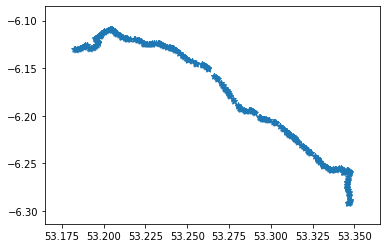

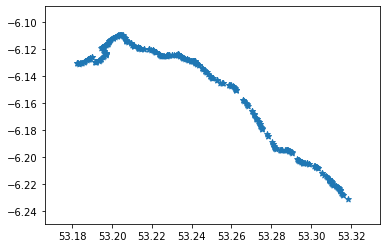

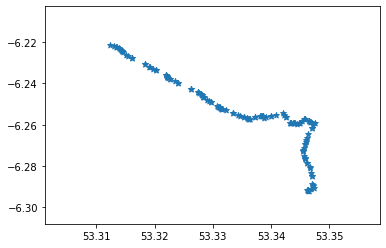

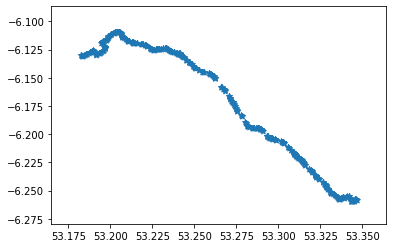

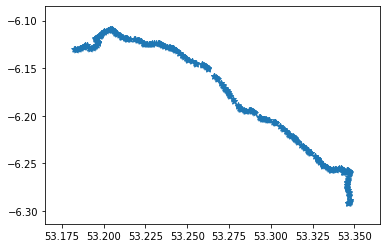

In [62]:
for item in shapes_145_0:
    plt.scatter(x=shapes.loc[shapes.shape_id == item, 'shape_pt_lat'],\
               y=shapes.loc[shapes.shape_id == item, 'shape_pt_lon'], marker = '*')
    
    plt.show()

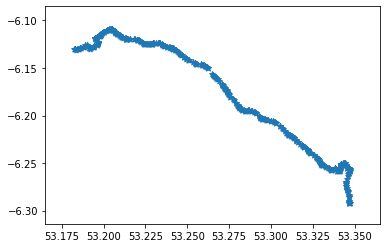

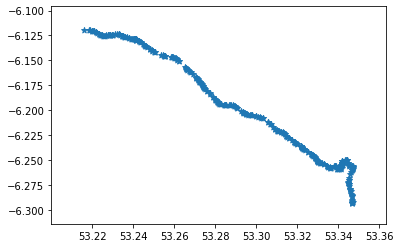

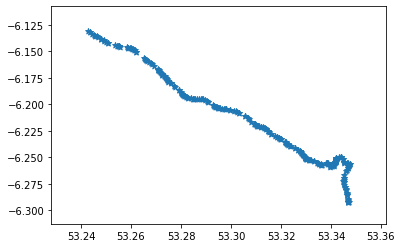

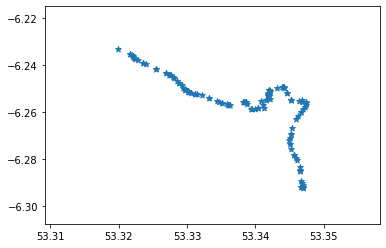

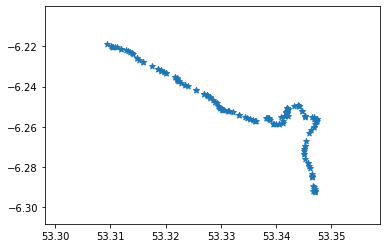

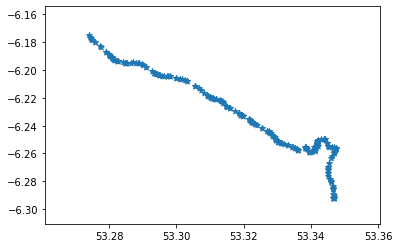

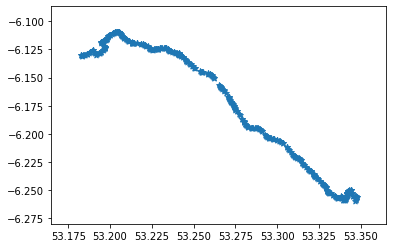

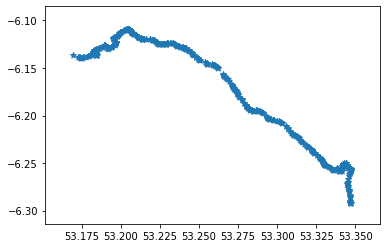

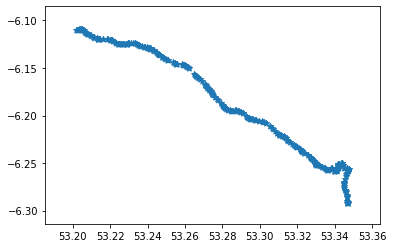

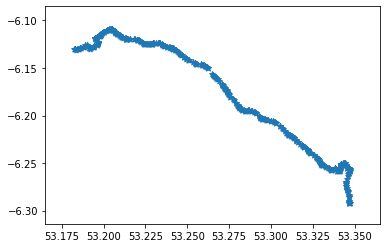

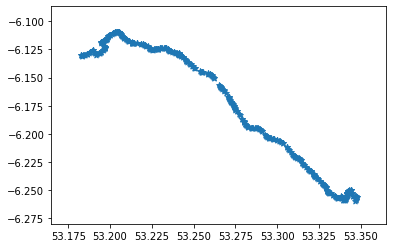

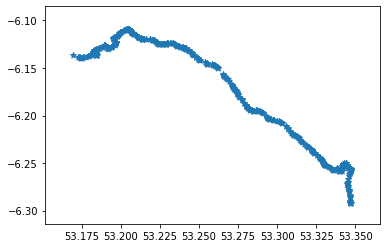

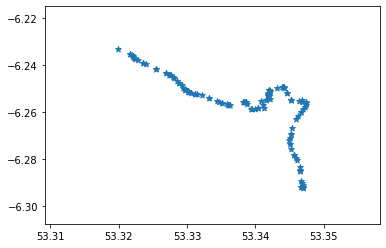

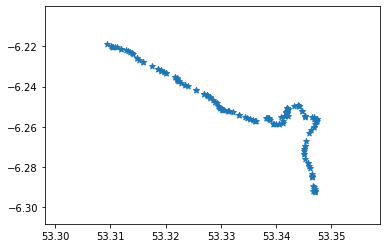

In [61]:
# plt.figure(figsize=(15, 15), dpi=80)
for item in shapes_145_1:
#     c = random.randint(0,100)
    plt.scatter(x=shapes.loc[shapes.shape_id == item, 'shape_pt_lat'],\
               y=shapes.loc[shapes.shape_id == item, 'shape_pt_lon'], marker = '*')
    plt.show()

Result: No.